In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix

In [ ]:
data = pd.read_csv('/content/sample_data/Housing.csv')

In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


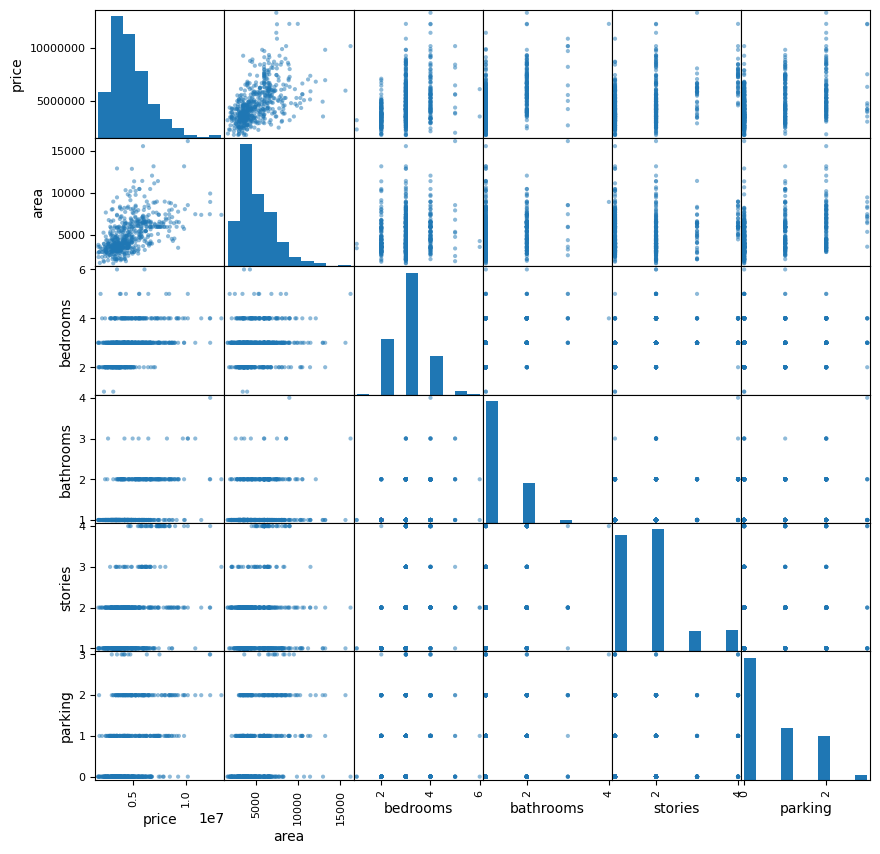

In [ ]:
scatter_matrix = scatter_matrix(data, figsize=(10,10))

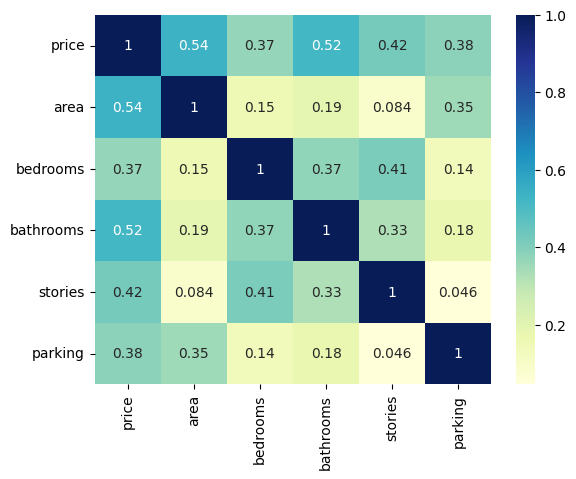

In [ ]:
data.corr(numeric_only=True)
dataplot = sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

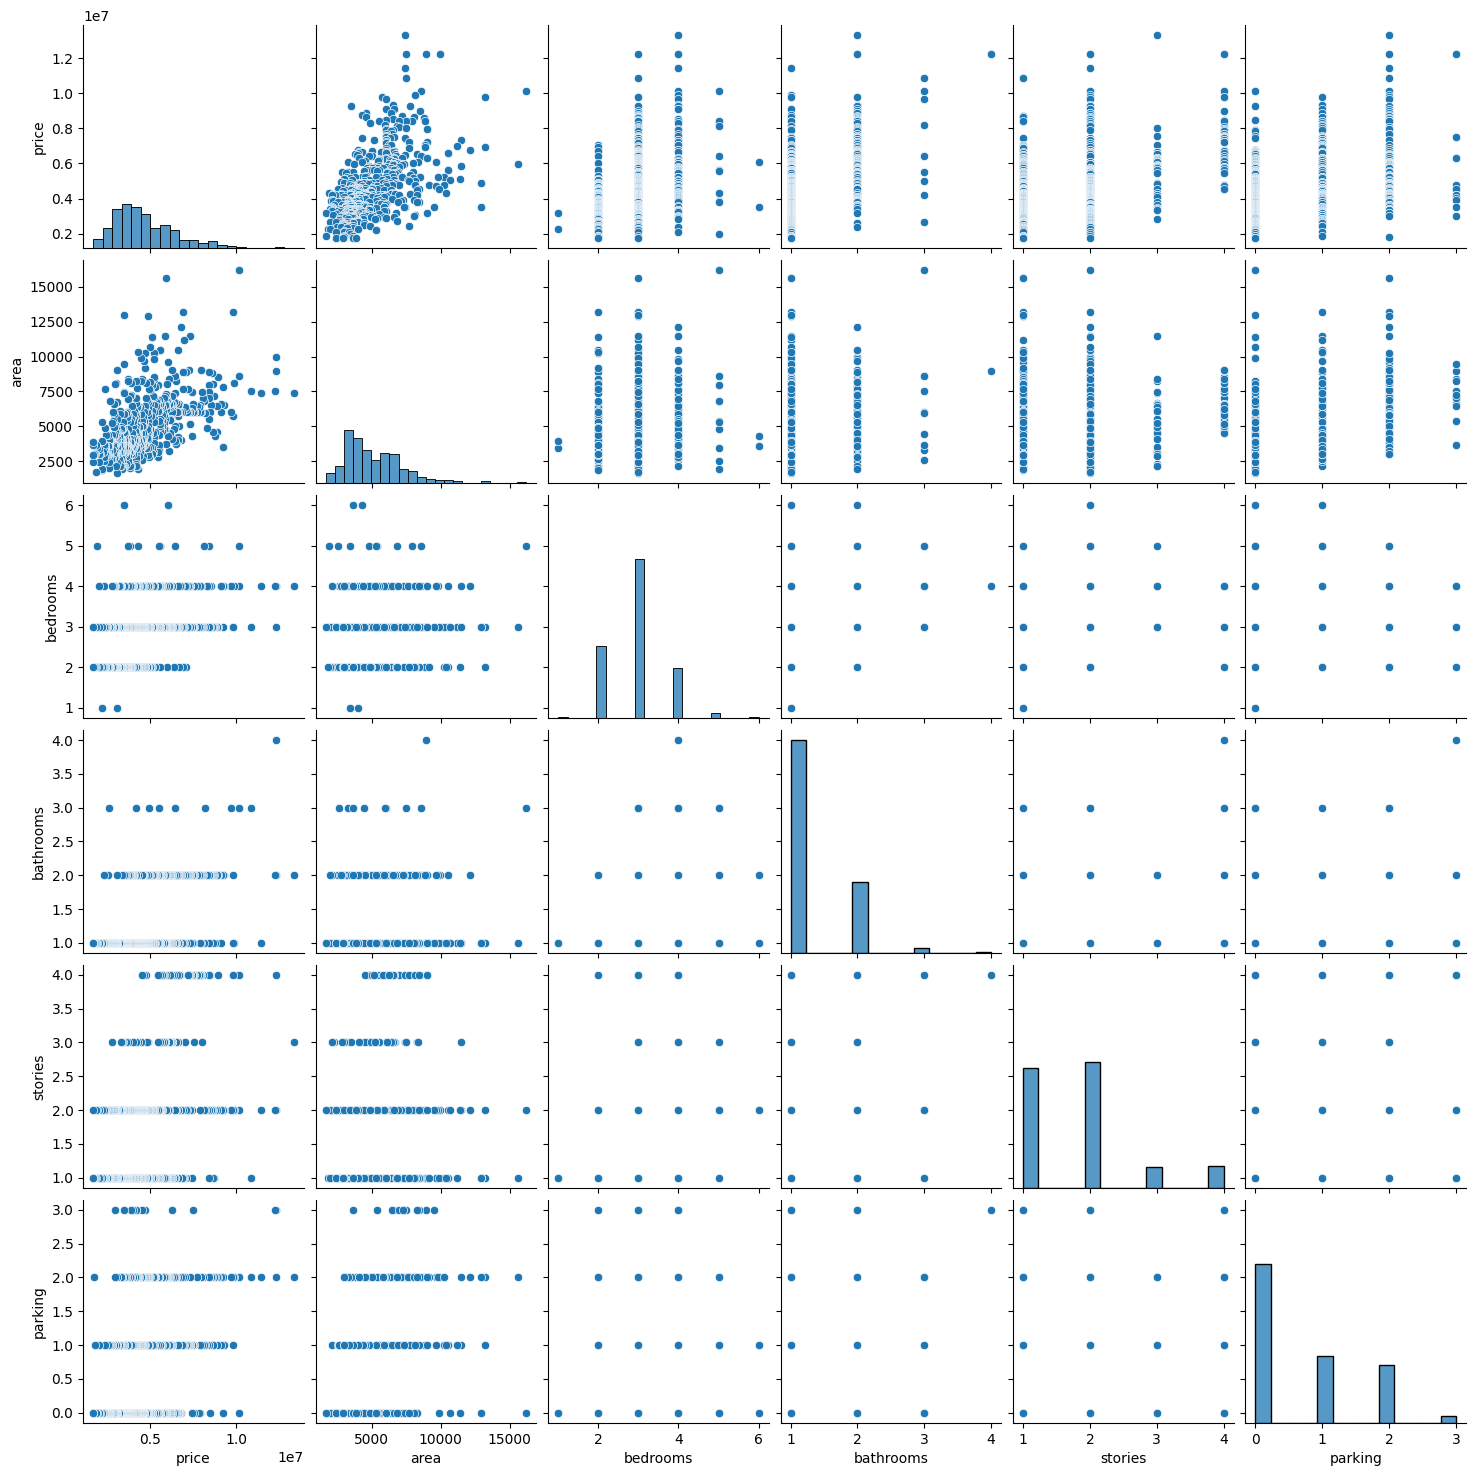

In [ ]:
pairplot = sns.pairplot(data)

In [ ]:
def binary_map(feature):
  return feature.map({'yes':1, 'no':0})

data['mainroad'] = binary_map(data['mainroad'])
data['guestroom'] = binary_map(data['guestroom'])
data['basement'] = binary_map(data['basement'])
data['hotwaterheating'] = binary_map(data['hotwaterheating'])
data['airconditioning'] = binary_map(data['airconditioning'])
data['prefarea'] = binary_map(data['prefarea'])

In [ ]:
data_encoded = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)
print(data_encoded.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  
1                       

In [ ]:
data_encoded['furnishingstatus_semi-furnished'] = data_encoded['furnishingstatus_semi-furnished'].map({True: 1, False: 0})
data_encoded['furnishingstatus_unfurnished'] = data_encoded['furnishingstatus_unfurnished'].map({True: 1, False: 0})
print(data_encoded.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                                0                             0  
1                       

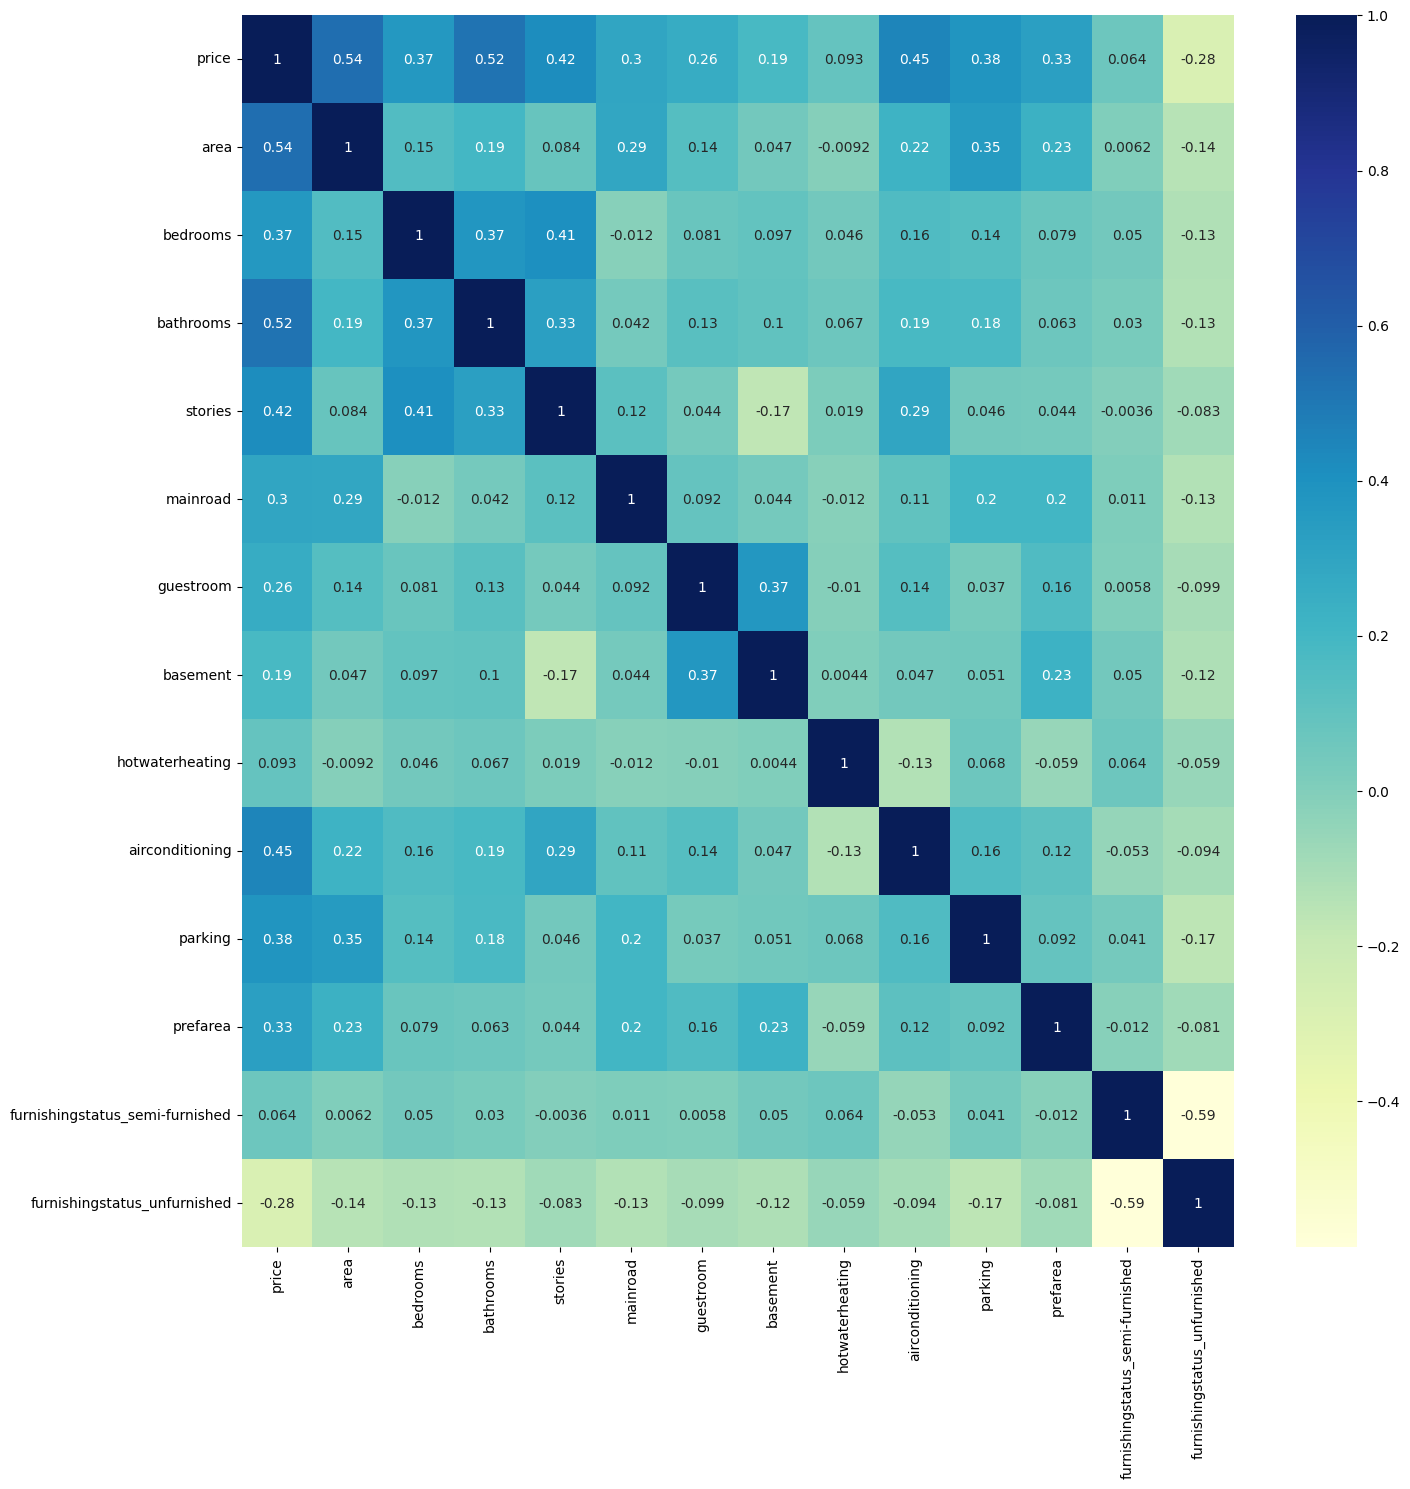

In [ ]:
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(16, 16))
dataplot = sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)

plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
X = data_encoded[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'airconditioning', 'parking', 'prefarea']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

           feature        VIF
0             area   8.236655
1         bedrooms  15.179712
2        bathrooms   9.366084
3          stories   7.870240
4         mainroad   6.767188
5        guestroom   1.466128
6         basement   2.012131
7  airconditioning   1.700528
8          parking   1.931814
9         prefarea   1.481643


In [ ]:
X = data_encoded[['area', 'stories', 'mainroad', 'guestroom', 'basement', 'airconditioning', 'parking', 'prefarea']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

           feature       VIF
0             area  6.766761
1          stories  4.572370
2         mainroad  6.442949
3        guestroom  1.457792
4         basement  1.792946
5  airconditioning  1.688780
6          parking  1.918852
7         prefarea  1.471145


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(data_encoded[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])



array([[ 1.04672629,  1.40341936,  1.42181174,  1.37821692,  1.51769249],
       [ 1.75700953,  1.40341936,  5.40580863,  2.53202371,  2.67940935],
       [ 2.21823241,  0.04727831,  1.42181174,  0.22441013,  1.51769249],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, -0.92939666, -0.80574124],
       [-1.03338891,  0.04727831, -0.57018671, -0.92939666, -0.80574124],
       [-0.5998394 ,  0.04727831, -0.57018671,  0.22441013, -0.80574124]])

In [ ]:
Y = data['price']
X = data_encoded.drop(columns=['price'])

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Tue, 21 Jan 2025   Prob (F-statistic):          9.07e-123
Time:                        17:49:37   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     